## Elaborato - Algoritmi di ottimizzazione combinatoria e su Rete 
- Boccarossa Antonio M63001655
- Brunello Francesco
- Pisani Luca


## Flying Sidekick Traveling Salesman Problem

### Presentazione del Problema

Il problema del commesso viaggiatore con droni (FS-TSP) è una variante del classico problema del commesso viaggiatore (TSP) che integra l'uso di droni per migliorare l'efficienza delle consegne. Invece di visitare tutti i clienti solo con un camion, come nel TSP tradizionale, l'FS-TSP prevede l'utilizzo di un drone come "spalla" per efficientare la consegna dei prodotti. 

**In sostanza, il problema si articola in questo modo:**
1. Un camion e un drone partono da un deposito centrale ('s') per consegnare merci a un insieme di clienti.
2. Il camion può effettuare consegne autonomamente o lanciare il drone da una posizione per servire un cliente.
3. Il drone ha un'autonomia limitata e deve tornare al camion per ricaricarsi o per essere recuperato.
4. L'obiettivo è determinare il percorso ottimale per il camion e il drone in modo da minimizzare il tempo totale di consegna per servire tutti i clienti e tornare al deposito. Inoltre, nel nostro caso, il deposito di ritorno darà indicato come 't', come nodo terminazione.

**I veicoli hanno le seguenti proprietà:**

*Camion*: Veicolo principale con autonomia illimitata. 
*Drone*: Veicolo di supporto con autonomia limitata e capacità di carico che si limita a un singolo pacco. 
*Tempo di percorrenza*: Tempo impiegato dal camion o dal drone per spostarsi tra due punti.
*Tempo di lancio (SL) e di recupero (SR):* Tempo impiegato per lanciare e recuperare il drone dal camion.


#### Complessità del problema
L'FS-TSP è un problema **NP-hard**, il che significa che non esiste un algoritmo noto in grado di trovare la soluzione ottimale in tempo polinomiale. La sua complessità aumenta con il numero di clienti e le limitazioni del drone (autonomia, tempo di lancio/recupero).

I **metodi di risoluzione** possono essere:
- Algortimi esatti, che garantiscono soluzione ottima ma per istanze piccole o medie.
- Algoritmi euristici e meta-euristici. 


Vedremo di seguito la sua formulazione *esatta* del problema e presenteremo alcune istanze *benchmark* per la formulazione mostrata. 

### Modellazione del problema

**Assunzioni**
1. Ogni cliente deve essere servito o dal drone o dal camion esattamente una volta.
2. Il drone e il camion partono e tornano a un deposito esattamente una volta.
3. Il camion ha una capacità non limitata e si comporta come base mobile per il dorne.
4. Il drone ha una durata limitata in termini di tempo di volo e può servire un cliente per volo.
5. Ogni percorso del drone inizia dal magazzino o da un nodo cliente.
6. Prima del lancio, il drone ha un tempo di *setup* (SL).
7. Il secondo nodo di un percorso deve essere un cliente servito dal drone
8. Il terzo nodo di un percorso deve essere o il deposito un un nodo cliente dove il drone torna al camion, senza che esso ri-visiti un nodo per recuperarlo.
9. Il drone, ha un tempo di recupero quando torna al camion (SR).


**Funzione obiettivo:** Minimizzare il tempo richiesto per servire ogni cliente e tornare al deposito.

**Formulazione**
- Il deposito è diviso nel nodo 's' come sorgente e 't' come destinazione.
- $G(V,A)$ è il grafo direzionato completo, dove $V=C \  \cup \  {s,t} $ e A l'insieme di archi.
- $\forall(i,j) \ \in \ A, t_{ij} $ è il tempo di navigazione del camion e $d_{ij}$ è il tempo di navigazione del drone.
- *SL* e *SR* sono rispettivamente i tempi di lancio e i tempi di recupero del drone.
- *Dtl* è il tempo limite del drone.

**Variabili di decisione**

*Binarie*
- $(i,j) \in A \quad y_{ij} = 1 $  se l'arco (i,j) è attraversato dal camion.
- $(i,j) \in A \quad h \in C \quad y_{ij}^h = 1 $ se l'arco (i,j) è attraversato dal camion mentre il drone serve il nodo h.
- $h \in C \quad \theta^h = 1 $ se il cliente h è servito dal drone.
- $i \in V \quad h \in C \quad  \omega_i^h=1$  se i è il nodo orgine del percorso che serve il nodo h.
- $i \in V \quad h \in C \quad  \delta_i^h=1$ e i è il nodo destinazione del percorso che serve il nodo h.

*Continue*
- $h \in C \quad \sigma^h = 1 $ è il tempo che il camion aspetta il drone al nodo destinazione del suo percorso servendo il cliente h.


**Funzione obiettivo**

$$min \quad \sum_{(i,j) \in A} t_{ij}y_{ij} + \sum_{h \in C} (SL + SR) \ \theta^h - \sum_{h \in C} SL\ \omega_s^h + \sum_{h\in C} \sigma^h$$



- Il primo termine rappresenta la lunghezza del percorso del camion.
- Il secondo e il terzo termine rappresentano il tempo di lancio e di recovery del drone.
- L'ultimo termine rappresenta il tempo di attesa del camion


**Vincoli**

*Vincoli di instradamento del camion.*
- $\sum\limits_{j: (s,j) \in A} y_{sj} = \sum\limits_{i: (i,t) \in A} y_{it} = 1 \quad$\
  *Un arco in uscita dalla sorgente e uno in ingresso per la destinazione.*
- $\sum\limits_{j: (i,j) \in A} y_{ij} = \sum\limits_{j: (j,i) \in A} y_{ji} \leq 1 \quad i \in V \quad$\
  *Un arco in uscita e un arco in ingresso se il nodo è vistato dal camion.*
- $\sum\limits_{(i,j) \in S | (i,j) \in A} y_{ij} \leq \sum\limits_{h \in S \backslash \{q\}} (1- \theta^h) \quad S \subseteq V, q \in S \quad$\
  *Vincolo eliminazione sottogiri.*

*Vincoli del percorso del camion.*
-  $\sum\limits_{j: (i,j) \in A} y_{ij}^h = \sum\limits_{j: (j,i) \in A} y_{ji}^h = \omega_i^h - \delta_i^h \quad i \in V \quad h \in C \quad$\
  *Per ogni percorso senza drone, è un path dal nodo di lancio al nodo di arrivo.* 

*Vincoli di singola assegnazione.*
- $y_{ij} + \omega_{i}^j + \delta_{i}^j \leq 1 \quad (i,j) \in A \quad$\
  *Se (i,j) è percorsa dal camion allora il drone non può andare da i a j o da j a i.*
- $\sum\limits_{j: (h,j) \in A} y_{hj} + \theta^h = 1 \quad h \in C \quad$\
  *Ogni cliente deve essere servito o dal drone o dal camion.*

*Vincoli di consistenza*
- $\sum\limits_{h \in C} y_{ij}^h \leq y_{ij} \quad (i,j) \in A \quad$\
  *Il percorso del camion mentre il drone serve un cliente, deve essere un subpath.*
- $\sum\limits_{i \in V \backslash \{t,h\}} \omega_{i}^h = \sum\limits_{j \in V \backslash \{s,h\}} \delta_{j}^h = \theta^h \quad h \in C \quad$\
  *Se h è servito dal drone, allora il percorso deve avere una sorgente e una destinazione.*
- $\sum\limits_{h \in C \backslash \{i\}} \omega_{i}^h + \theta^i \leq 1 \quad i \in C \quad$\
  *Se i è il punto di lancio, allora non può essere servito dal drone.*
- $\sum\limits_{h \in C \backslash \{j\}} \delta_{j}^h + \theta^j \leq 1 \quad j \in C \quad$\
  *Se j è il punto di destinazione, allora non può essere servito dal drone.*

*Vincoli di endurance del drone*
- $\sum_\limits{(i,j) \in A} t_{ij} \  y_{ij}^h \leq (Dtl - SR) \theta^h \quad h \in C \quad$\
  *La durata del percorso del camion non può eccedere l'endurance del drone.*
- $\sum_\limits{i \in V \backslash \{t\}} d_{ih} \  \omega{i}^h  + \sum_\limits{j \in V \backslash \{s\}} d_{hj} \ \delta{j}^h  \leq (Dtl - SR)\  \theta^h \quad h \in C \quad$\
  *La durata del percorso del drone non può eccedere la sua endurance.*

*Vincoli di attesa.*
- $\sum\limits_{i \in V \backslash \{t\}} d_{ih} \  \omega_{i}^h  + \sum\limits_{j \in V \backslash \{s\}} d_{hj} \  \delta_{j}^h -  \sum_{(i,j) \in A} t_{ij} y_{ij}^h \leq \sigma^h \quad h \in C \quad$\

*Il tempo di attesa del camion è dato dalla differenza dalla durata del percorso del drone e della durata del percorso del camion, se quest'ultima è maggiore di 0.* 

### Implementazione

#### Estrazione dei dati

In [6]:
"""
Estrazione dati da file...
"""

customers = ['c1', 'c2', 'c3']  # Set of customers C
nodes = ['s', 'c1', 'c2', 'c3', 't']  # Set of all nodes V
arcs = {('s', 'c1'), ('s', 'c2'), ('c1', 'c3'), ('c2', 'c3'), ('c3', 'c1'), ('c2', 't'), ('c3', 't')}  # Example arcs A
truck_travel_time = {  # Example tij
    ('s', 'c1'): 5, ('s', 'c2'): 12, ('c2', 'c3'): 10, ('c1', 'c3'): 8, ('c3', 'c1'):8,
    ('c2', 't'): 15, ('c3', 't'): 11
} 
drone_travel_time = {  # Example dij (replace with actual values)
    ('s', 'c1'): 5, ('s', 'c2'): 6,  ('c2', 'c3'): 3, ('c1', 'c3'): 4, ('c3', 'c1'):4,
    ('c2', 't'): 7, ('c3', 't'): 6
}

drone_launch_time = 2  # Example SL
drone_recovery_time = 2  # Example SR
drone_time_limit = 15  # Example Dtl


#### Variabili di decisione

In [7]:
import gurobipy as gp
# Create a Gurobi Model
model = gp.Model("Drone-Assisted Vehicle Routing")

# (i,j) ∈ A:  Truck path (1 if the truck travels on arc (i,j), 0 otherwise)
y = {}
for (i,j) in arcs:
    y[i, j] = model.addVar(vtype=gp.GRB.BINARY, name=f"y_{i}_{j}")

# (i,j) ∈ A, h ∈ C: Drone use (1 if drone serves customer h while truck traverses (i,j))
y_prime = {}
for i, j in arcs:
    for h in customers:
        y_prime[i, j, h] = model.addVar(vtype=gp.GRB.BINARY, name=f"y_prime_{i}_{j}_{h}")

# h ∈ C: Drone service (1 if customer h is served by the drone, 0 otherwise)
theta = {}
for h in customers:
    theta[h] = model.addVar(vtype=gp.GRB.BINARY, name=f"theta_{h}")

# i ∈ V, h ∈ C: Origin of drone sortie (1 if node i is the origin for serving customer h)
omega = {}
for i in nodes:
    for h in customers:
        omega[i, h] = model.addVar(vtype=gp.GRB.BINARY, name=f"omega_{i}_{h}")

# i ∈ V, h ∈ C: Destination of drone sortie (1 if node i is the destination for serving h)
delta = {}
for i in nodes:
    for h in customers:
        delta[i, h] = model.addVar(vtype=gp.GRB.BINARY, name=f"delta_{i}_{h}")

# 2. Continuous Variables

# h ∈ C: Waiting time of the truck at the destination of the sortie serving customer h
sigma = {}
for h in customers:
    sigma[h] = model.addVar(vtype=gp.GRB.CONTINUOUS, name=f"sigma_{h}")


#### Funzione obiettivo.

In [8]:
objective = (
    gp.quicksum(truck_travel_time[i, j] * y[i, j] for (i,j) in arcs) +  # Truck route length
    gp.quicksum((drone_launch_time + drone_recovery_time) * theta[h] for h in customers) -  # Launch & recovery
    gp.quicksum(drone_launch_time * omega['s', h] for h in customers) + # Launch at depot
    gp.quicksum(sigma[h] for h in customers)  # Waiting time
)

model.setObjective(objective, gp.GRB.MINIMIZE)

#### Vincoli di instradamento del camion. 

In [9]:
# One outgoing arc from the origin, one incoming arc to the destination
model.addConstr(gp.quicksum(y['s', j] for j in nodes if ('s', j) in arcs) == 1)
model.addConstr(gp.quicksum(y[i, 't'] for i in nodes if (i, 't') in arcs) == gp.quicksum(y['s', j] for j in nodes if ('s', j) in arcs))



# Flow conservation for other nodes visited by the truck
for i in customers:
        model.addConstr(gp.quicksum(y[j, i] for j in nodes if (j, i) in arcs) == gp.quicksum(y[i, j] for j in nodes if (i, j) in arcs) )
        model.addConstr(gp.quicksum(y[i, j] for j in nodes if (i, j) in arcs)<= 1)




# Subtour elimination constraints (preventing cycles), 
for i in nodes:
    for j in nodes:
        if i != j and (i, j) in arcs:
            model.addConstr(
                gp.quicksum(y[i, k] for k in nodes if (i, k) in arcs) <= 
                gp.quicksum((1 - theta[h]) for h in customers if (i, j) in arcs)
            )

#### Vincoli sul percorso del camion.

In [10]:
for i in nodes:
    for h in customers:
        model.addConstr(
            gp.quicksum(y_prime[i, j, h] for j in nodes if (i, j) in arcs) -
            gp.quicksum(y_prime[j, i, h] for j in nodes if (j, i) in arcs) == 
            omega[i, h] - delta[i, h] 
        )

#### Vincoli di assegnamento singolo. 

In [11]:
# 3. Single Assignment Constraints
# --------------------------------

# Drone can't fly from i if (i, j) is crossed by the truck
for i, j in arcs:
    if j in customers:
        model.addConstr(y[i, j] + omega[i, j] + delta[i, j] <= 1)



# Each client must be served either by the truck or the drone
for h in customers:
    model.addConstr(
        gp.quicksum(y[h,j] for j in nodes if (h, j) in arcs) + theta[h] == 1
    )


#### Vincoli di consistenza.

In [12]:

# The truck path during a drone sortie must be a subpath or the origin-destination path
for (i,j) in arcs:
    model.addConstr(gp.quicksum(y_prime[i, j, h] for h in customers) <= y[i, j])



# If h is served by the drone, the corresponding sortie must have a launch and a recovery node
for h in customers:
    model.addConstr(gp.quicksum(omega[i, h] for i in nodes if (i, h) in omega and i!='t' and i!=h) == 
                    gp.quicksum(delta[j, h] for j in nodes if (j, h) in delta if j!= 's' and j!=h))
    
    model.addConstr(gp.quicksum(omega[i, h] for i in nodes if (i, h) in omega and i!='t' and i!=h) == theta[h])





# If i is the launch node of a sortie, it can't be served by the drone
for i in customers: 
    model.addConstr(gp.quicksum(omega[i, h] for h in customers if (i, h) in omega and h!=i) + theta[i] <= 1)




# If j is the recovery node of a sortie, it can't be served by the drone
for j in customers:
    model.addConstr(gp.quicksum(delta[j, h] for h in customers if (j, h) in delta and h!=j) + theta[j] <= 1)


#### Vincoli di endurance del drone. 

In [13]:

# The duration of the truck path of a sortie can't exceed the drone endurance
for h in customers:
    model.addConstr(gp.quicksum(truck_travel_time[i, j] * y_prime[i, j, h] for (i,j) in arcs) <= 
                    (drone_time_limit - drone_recovery_time) * theta[h])



# The duration of a drone sortie can't exceed the drone endurance
for h in customers:
    model.addConstr(
        gp.quicksum(drone_travel_time[i, h] * omega[i, h] for i in nodes if (i, h) in drone_travel_time and i!='t') +
        
        gp.quicksum(drone_travel_time[h, j] * delta[j, h] for j in nodes if (h, j) in drone_travel_time and j!='s') <= 
        
        (drone_time_limit - drone_recovery_time) * theta[h]
    )


#### Vincoli di attesa.

In [14]:
# The truck waiting time of a sortie is given by the difference between the duration of the drone path 
# and the duration of the truck path, if it is greater than 0
for h in customers:
    model.addConstr(
        gp.quicksum(drone_travel_time[i, h] * omega[i, h] for i in nodes if (i, h) in drone_travel_time and i!='t') +
        gp.quicksum(drone_travel_time[h, j] * delta[j, h] for j in nodes if (h, j) in drone_travel_time and j!='s') -
        gp.quicksum(truck_travel_time[i, j] * y_prime[i, j, h] for (i, j) in arcs) <=
        sigma[h]
    )


### Ottimizzazione e stampa della soluzione.

In [15]:

model.optimize()

truckSOL = []
droneSOL= []

print("Path Camion: ")
for (i,j) in arcs:
    if y[i,j].X > 0.5:
        print("("+str(i)+","+str(j)+")")
        truckSOL.append((i,j))
        

print("Path Drone:")
for (i,j) in arcs:
    for h in customers:
        
            if omega[i,h].X > 0.5:
                print((i,h))
                
            if delta[j,h].X > 0.5:
                print((j,h))

        

            if omega[i,h].X > 0.5:
                if theta[h].X > 0.5:
                    if (i,h) in arcs:
                        droneSOL.append((i,h))
        
            if delta[j,h].X > 0.5:
                    droneSOL.append((h,j))

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 7735U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 66 rows, 64 columns and 297 nonzeros
Model fingerprint: 0xeeb0a2ef
Variable types: 3 continuous, 61 integer (61 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 37.0000000
Presolve removed 53 rows and 52 columns
Presolve time: 0.02s
Presolved: 13 rows, 12 columns, 47 nonzeros
Found heuristic solution: objective 35.0000000
Variable types: 0 continuous, 12 integer (11 binary)

Root relaxation: objective 2.600000e+01, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incu

### Disegno del grafo 

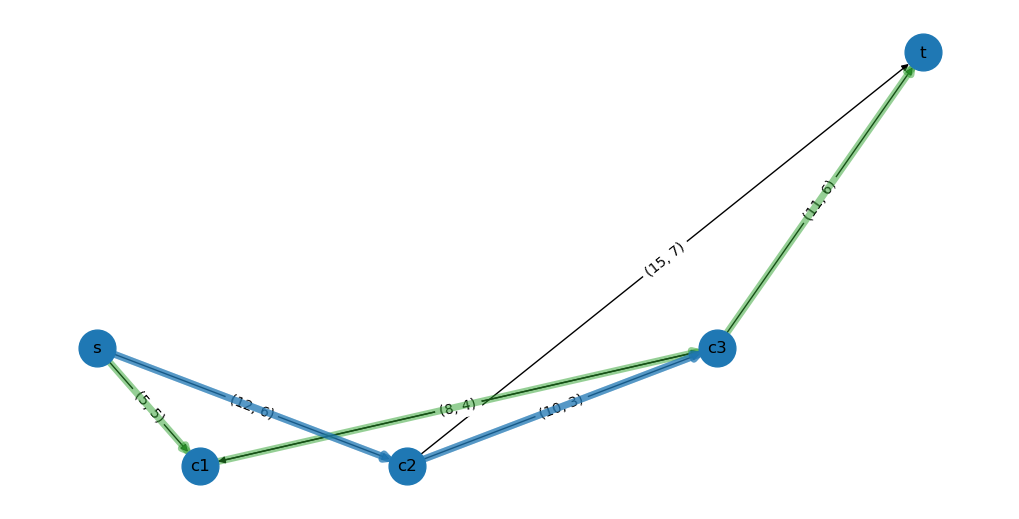

In [18]:
import networkx as nx #uso networkx e pyplot di matplotlib
import matplotlib.pyplot as plt


#Genero etichette di label 

labels = {}

for (i,j) in arcs:
    labels[(i,j)] = (truck_travel_time[i,j], drone_travel_time[(i,j)])

posofnodes = {}

posofnodes['s'] = (1,5)
posofnodes['c1'] = (2,3)
posofnodes['c2'] = (4,3)
posofnodes['c3'] = (7,5)
posofnodes['t'] = (9,10)



#Come disegno un grafo?
G = nx.DiGraph() #grafo orientato, se volessi non orientato è Graph

# aggiunge i nodi
G.add_nodes_from(nodes) #add_nodes_from mi permette di aggiunegre una lista di nodi, tramite nodes

# aggiunge gli archi
G.add_edges_from(arcs) #stesso per add_edges_from con gli archi e i valori

# disegna il grafo
plt.figure(figsize=(10,5)) #serve per plottare il rettangolo 

nx.draw(G, posofnodes, with_labels=True, node_size=700) #per plottare il grafo, nx.draw con Grafo, posizione dei nodi, se con label (del nodo) o meno 
# e la grandezza dei nodi

nx.draw_networkx_edge_labels(G, posofnodes, edge_labels=labels, label_pos=0.5) #se voglio anche i costi allora uso questa funzione, 
# i costi dati dagli archi e la posizione delle label. 

plt.draw() #plot del draw. 


nx.draw_networkx_edges(G, posofnodes, edgelist=truckSOL, width=5, alpha=0.5, edge_color="tab:green")
nx.draw_networkx_edges(G, posofnodes, edgelist=droneSOL, width=5, alpha=0.5, edge_color="tab:blue")
plt.draw()
